In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def rename_strings(input_string):
    # Dictionary mit Umbenennungsregeln
    rename_dict = {
        "Experiment_x264_energy": "x264",
        "Experiment_VP8_pervolution_energy": "VP8",
        "Experiment_PostgreSQL_pervolution_energy": "Postgres",
        "Experiment_nginx_energy": "nginx",
        "Experiment_lrzip_energy": "lrzip",
        "Experiment_HSQLDB_energy": "HSQLDB",
        "Experiment_7z_energy": "7z",
        "Experiment_Apache_energy": "Apache",
        "Random_3": "Random 3",
        "Random_2": "Random 2",
        "Random_1": "Random 1",
        "baysian": "Baysiansche-Regression",
        "cqr_lin_quant_None": "CQR-Linear",
        "cv_plus_rf_None": "Crossvalidation+ RandomForest",
        "cv_plus_lin_lasso_None": "Crossvalidation+ LinearLasso"

        # Weitere Umbenennungen hier hinzufügen
    }

    # Prüfen, ob der input_string im Dictionary existiert
    if input_string in rename_dict:
        return rename_dict[input_string]
    else:
        # Wenn keine Übereinstimmung gefunden wird, den originalen input_string zurückgeben
        return input_string

In [9]:
exp_path = "/mnt/e/Experiment_VP8_pervolution_energy" #Beispiel Pfad
alpha = 0.1
sampling = "Random_3"
run = "run_15"
method = "baysian"
method_2 = "cqr_lin_quant_None"
method_3 = "cv_plus_lin_lasso_None"

In [10]:
df_pred = pd.read_csv(os.path.join(exp_path, sampling, run, f"{method}_pred.csv"))

df_pred_2 = pd.read_csv(os.path.join(exp_path, sampling, run, f"{method_2}_pred.csv"))
df_pred_3 = pd.read_csv(os.path.join(exp_path, sampling, run, f"{method_3}_pred.csv"))
df_pred["interval_length"] = abs(df_pred["interval_max"]-df_pred["interval_min"])
df_pred

,predicted,interval_min,interval_max,measured,interval_length
0,1639.310852,-674.693481,4201.559082,4280.4,4876.252563
1,785.094055,-448.908203,2944.631104,2617.4,3393.539307
2,2220.663452,-182.949844,4461.333496,4080.0,4644.283340
3,983.477753,-396.578674,2474.401123,346.6,2870.979797
4,1803.057129,644.717590,3113.423340,1734.4,2468.705750
...,...,...,...,...,...
395,2455.402222,-302.243927,3651.890869,2923.8,3954.134796
396,1308.346680,205.311569,2388.775391,1142.2,2183.463821
397,1977.044434,-229.925491,4728.750977,1417.8,4958.676468
398,771.626923,-945.934875,2526.253662,311.0,3472.188538


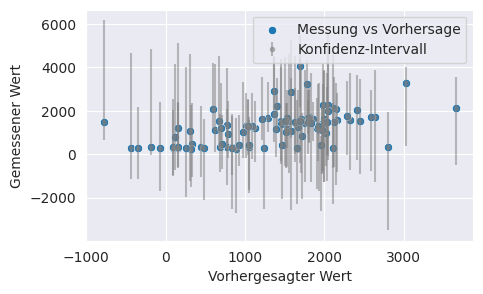

In [11]:
# Zufällige Auswahl von 5 Zeilen aus dem DataFrame
df_sample = df_pred.sample(n=100, random_state=1)  # random_state für Reproduzierbarkeit

# Scatterplot erstellen
plt.figure(figsize=(5, 3))
sns.scatterplot(x='predicted', y='measured', data=df_sample, label='Messung vs Vorhersage')

# Fehlerbalken hinzufügen
plt.errorbar(df_sample['predicted'], df_sample['measured'],
             yerr=[df_sample['predicted'] - df_sample['interval_min'], df_sample['interval_max'] - df_sample['predicted']],
             fmt='.', color='grey', alpha=0.5, label='Konfidenz-Intervall')

# Achsenbeschriftungen und Titel
plt.xlabel('Vorhergesagter Wert')
plt.ylabel('Gemessener Wert')
#plt.title('Comparison of Predicted and Measured Values with Prediction Intervals')
plt.legend()

# Plot anzeigen
plt.show()

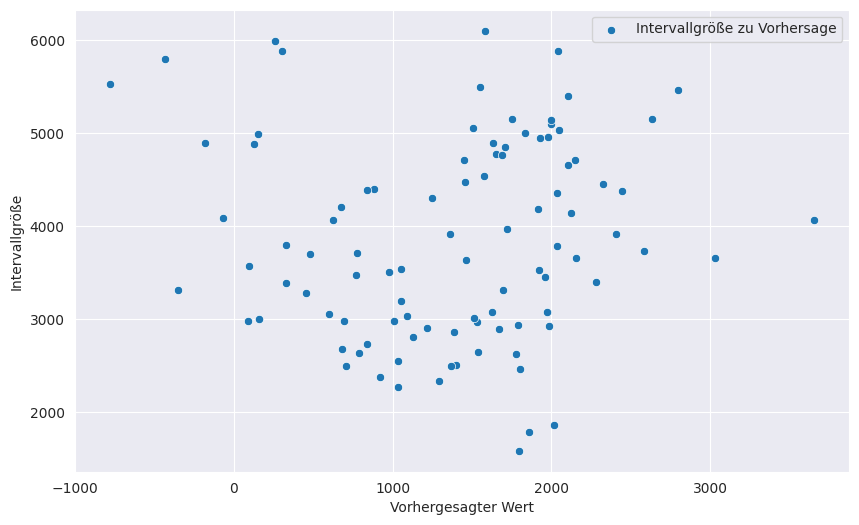

In [12]:
# Scatterplot erstellen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted', y='interval_length', data=df_sample, label='Intervallgröße zu Vorhersage')

# Achsenbeschriftungen und Titel
plt.xlabel('Vorhergesagter Wert')
plt.ylabel('Intervallgröße')
#plt.title('Comparison of Predicted and Measured Values with Prediction Intervals')
plt.legend()

# Plot anzeigen
plt.show()

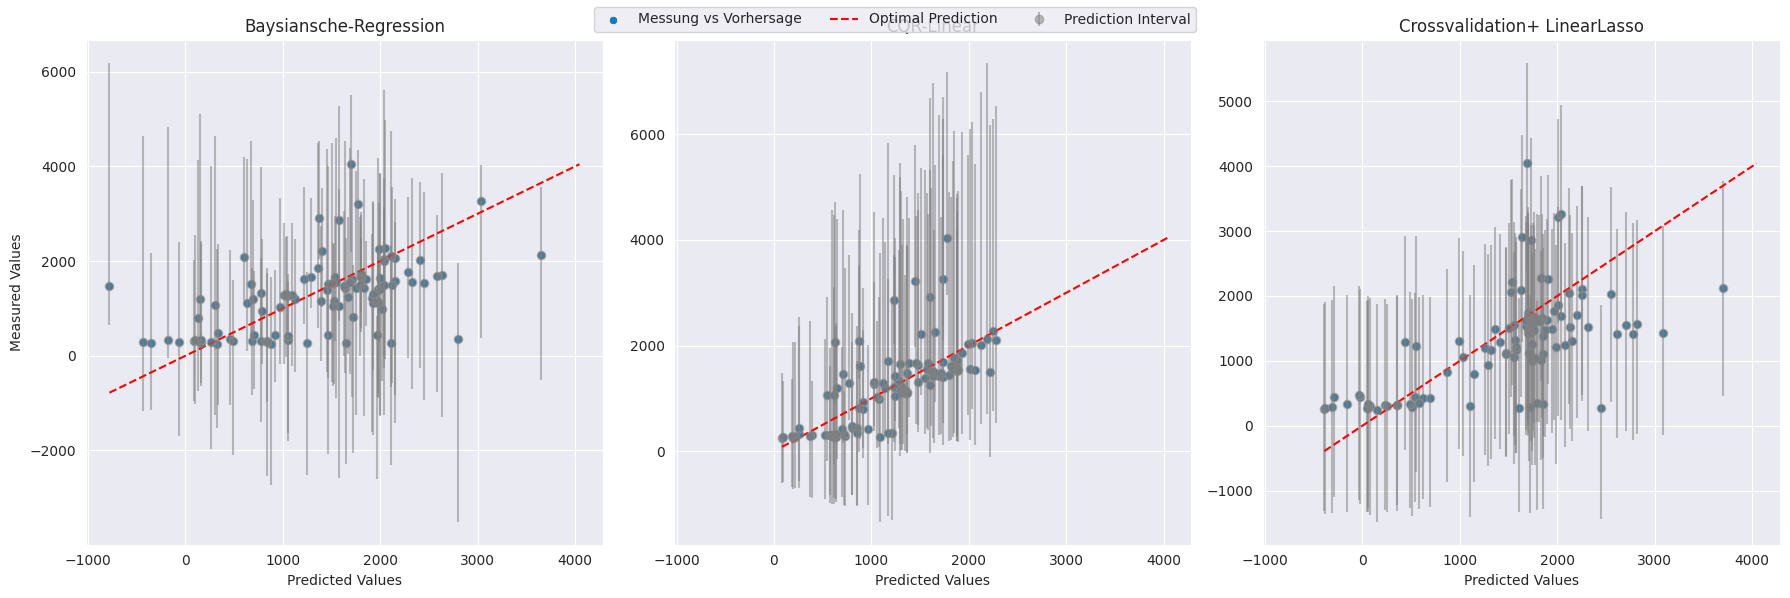

In [13]:
# Zufällige Auswahl von 5 Zeilen aus jedem DataFrame
df_sample1 = df_pred.sample(n=100, random_state=1)
df_sample2 = df_pred_2.sample(n=100, random_state=1)
df_sample3 = df_pred_3.sample(n=100, random_state=1)

# Subplots erstellen
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False, sharex=True)

# Erster Plot
sns.scatterplot(ax=axs[0], x='predicted', y='measured', data=df_sample1, label='Messung vs Vorhersage', legend=False)
axs[0].errorbar(df_sample1['predicted'], df_sample1['measured'],
                yerr=[abs(df_sample1['predicted'] - df_sample1['interval_min']), abs(df_sample1['interval_max'] - df_sample1['predicted'])],
                fmt='o', color='grey', alpha=0.5, label='Prediction Interval')
min_value, max_value = df_sample1[['predicted', 'measured']].min().min(), df_sample1[['predicted', 'measured']].max().max()
axs[0].plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red', label='Optimal Prediction')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Measured Values')
axs[0].set_title(f'{rename_strings(method)}')

# Zweiter Plot
sns.scatterplot(ax=axs[1], x='predicted', y='measured', data=df_sample2, label='Messung vs Vorhersage', legend=False)
axs[1].errorbar(df_sample2['predicted'], df_sample2['measured'],
                yerr=[abs(df_sample2['predicted'] - df_sample2['interval_min']), abs(df_sample2['interval_max'] - df_sample2['predicted'])],
                fmt='o', color='grey', alpha=0.5, label='Prediction Interval')
min_value, max_value = df_sample2[['predicted', 'measured']].min().min(), df_sample2[['predicted', 'measured']].max().max()
axs[1].plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red', label='Optimal Prediction')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('')
axs[1].set_title(f'{rename_strings(method_2)}')

# Dritter Plot
sns.scatterplot(ax=axs[2], x='predicted', y='measured', data=df_sample3, label='Messung vs Vorhersage', legend=False)
axs[2].errorbar(df_sample3['predicted'], df_sample3['measured'],
                yerr=[df_sample3['predicted'] - df_sample3['interval_min'], df_sample3['interval_max'] - df_sample3['predicted']],
                fmt='o', color='grey', alpha=0.5, label='Prediction Interval')
min_value, max_value = df_sample3[['predicted', 'measured']].min().min(), df_sample3[['predicted', 'measured']].max().max()
axs[2].plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red', label='Optimal Prediction')
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('')
axs[2].set_title(f'{rename_strings(method_3)}')

# Gemeinsame Legende
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)

# Plot anzeigen
plt.tight_layout()
plt.show()

measured    245.0
dtype: float64


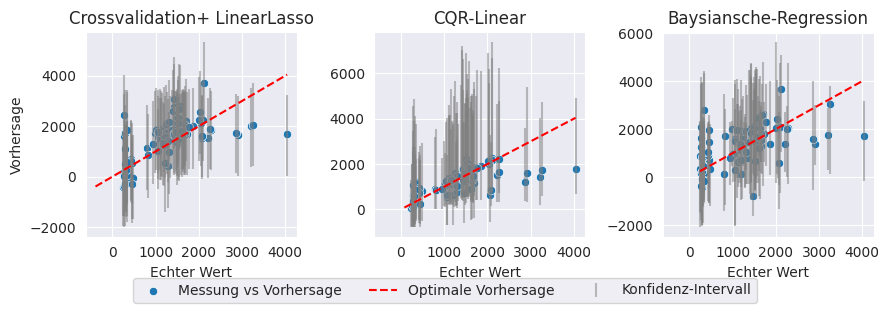

In [15]:
# Subplots erstellen
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False, sharex=True)

# Erster Plot
sns.scatterplot(ax=axs[2], x='measured', y='predicted', data=df_sample1, label='Messung vs Vorhersage', legend=False)
axs[2].errorbar(df_sample1['measured'], df_sample1['predicted'],
                yerr=[abs(df_sample1['predicted'] - df_sample1['interval_min']), abs(df_sample1['interval_max'] - df_sample1['predicted'])],
                fmt=' ', color='grey', alpha=0.5, label='Konfidenz-Intervall')
min_value, max_value = df_sample1[['measured']].min(), df_sample1[['measured']].max()
print(min_value)
axs[2].plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red', label='Optimale Vorhersage')
axs[2].set_xlabel('Echter Wert')
axs[2].set_ylabel('')
axs[2].set_title(f'{rename_strings(method)}')

# Zweiter Plot
sns.scatterplot(ax=axs[1], x='measured', y='predicted', data=df_sample2, label='Messung vs Vorhersage', legend=False)
axs[1].errorbar(df_sample2['measured'], df_sample2['predicted'],
                yerr=[abs(df_sample2['predicted'] - df_sample2['interval_min']), abs(df_sample2['interval_max'] - df_sample2['predicted'])],
                fmt=' ', color='grey', alpha=0.5, label='Konfidenz-Intervall')
min_value, max_value = df_sample2[['measured', 'predicted']].min().min(), df_sample2[['measured', 'predicted']].max().max()
axs[1].plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red', label='Optimale Vorhersage')
axs[1].set_xlabel('Echter Wert')
axs[1].set_ylabel('')
axs[1].set_title(f'{rename_strings(method_2)}')
#axs[1].set_ylim(4.9, 8)

# Dritter Plot
sns.scatterplot(ax=axs[0], x='measured', y='predicted', data=df_sample3, label='Messung vs Vorhersage', legend=False)
axs[0].errorbar(df_sample3['measured'], df_sample3['predicted'],
                yerr=[abs(df_sample3['predicted'] - df_sample3['interval_min']), abs(df_sample3['interval_max'] - df_sample3['predicted'])],
                fmt=' ', color='grey', alpha=0.5, label='Konfidenz-Intervall')
min_value, max_value = df_sample3[['measured', 'predicted']].min().min(), df_sample3[['measured', 'predicted']].max().max()
axs[0].plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red', label='Optimale Vorhersage')
axs[0].set_xlabel('Echter Wert')
axs[0].set_ylabel('Vorhersage')
axs[0].set_title(f'{rename_strings(method_3)}')
#axs[0].set_ylim(4.9, 8)

# Gemeinsame Legende
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Plot anzeigen
plt.tight_layout()
plt.savefig(os.path.join(exp_path, f"{run}_scatter_comp.png"), bbox_inches='tight', pad_inches=0.1)
plt.show()